In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_flower = [4.5, 1]

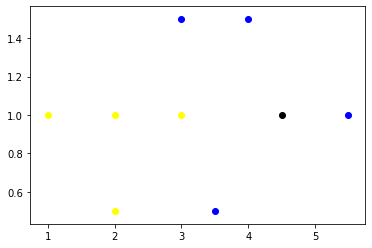

In [75]:
for i in range(len(data)):
    if data[i][2] == 1:
        color = 'BLUE'
        plt.scatter(data[i][0], data[i][1], c = color)
    else:
        color = 'YELLOW'
        plt.scatter(data[i][0], data[i][1], c = color)
        
plt.scatter(mystery_flower[0], mystery_flower[1], color = 'BLACK')
plt.show()

In [27]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [28]:
def sigmoid_p(x):
    return sigmoid(x) *(1-sigmoid(x))

In [70]:
def train():
    # initilization of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    
    iteration = 100000
    learning_rate = 0.01
    
    costs = []
    
    for i in range(iteration):
        ri = np.random.randint(len(data))
        data_point = data[ri] 
    
        z = w1*data_point[0] + w2*data_point[1] + b
        #network prediction
        pred = sigmoid(z)
        
        target = data_point[2]
        
        cost = np.square(pred - data_point[2])
        
        
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
        
       # 2 * (pred - target) * sigmoid_p(z) * point[0]
        
        w1 = w1 - learning_rate * (2 * (pred - data_point[2]) * sigmoid_p(z) * data_point[0])
        w2 = w2 - learning_rate * (2 * (pred - data_point[2]) * sigmoid_p(z) * data_point[1])
        b = b - learning_rate * (2 * (pred - data_point[2]) * sigmoid_p(z) * 1)
        
    return costs, w1, w2, b
        
costs, w1, w2, b = train()


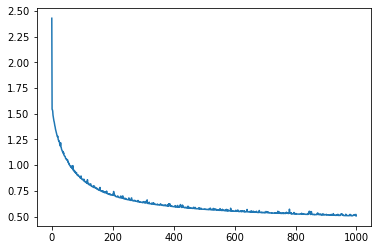

In [74]:
plt.plot(costs)
plt.show()

In [72]:
z = w1*mystery_flower[0] + w2*mystery_flower[1] + b
pred = sigmoid(z)
pred


0.9830895577041429

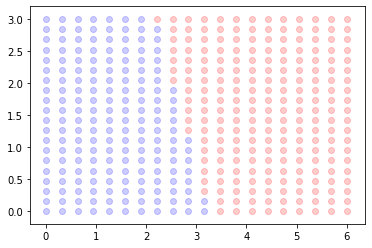

In [77]:
for x in np.linspace(0,6,20):
    for y in np.linspace(0,3,20):
        z = sigmoid(x*w1 + y*w2 + b)
        c = 'blue'
        if z > 0.5:
            c = 'red'
        plt.scatter(x,y,c=c, alpha = 0.2)